In [2]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
claim=pd.read_csv('https://raw.githubusercontent.com/saritmaitra/Fraud-detection--Insurance/master/data/insurance_claims.csv')

In [4]:
claim

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


This is the dataset which contains the details of the insurance policy along with the customer details.
It also has the details of the accident on the basis of which the claims have been made. 
Here we have to create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [5]:
claim.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


This is the first five rows and columns of the given dataset.

In [6]:
claim.shape

(1000, 40)

This shows the total number of rows and columns present in the dataset.
there are total 1000 rows and 40 columns.

In [7]:
claim.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

This are the name of all the columns .

In [8]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Here we can see the number of rows,the null values and dtype.
We can notice that there are no missing values as all the columns counting are same except c39 which 0 values.
There are 2 float, 17 int64, 21 object dtype.

In [9]:
claim.nunique().to_frame('No of unique values')

,No of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


This shows the number of unique values present in each columns.

In [10]:
claim.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
nu

As we can see that there are only null values present in the column _c39, so it is better to drop this column.

In [11]:
#dropping the column
claim.drop(['policy_number'],axis=1,inplace=True)
claim.drop(['insured_zip'],axis=1,inplace=True)
claim.drop(['policy_bind_date'],axis=1,inplace=True)
claim.drop(['incident_location'],axis=1,inplace=True)
claim.drop(['_c39'],axis=1,inplace=True)
claim.drop(['auto_year'],axis=1,inplace=True)
claim.drop(['incident_hour_of_the_day'],axis=1,inplace=True)

In [12]:
claim

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,?,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,0,1,?,87200,17440,8720,61040,Honda,Accord,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,0,1,YES,46980,5220,5220,36540,Audi,A5,N


<Axes: >

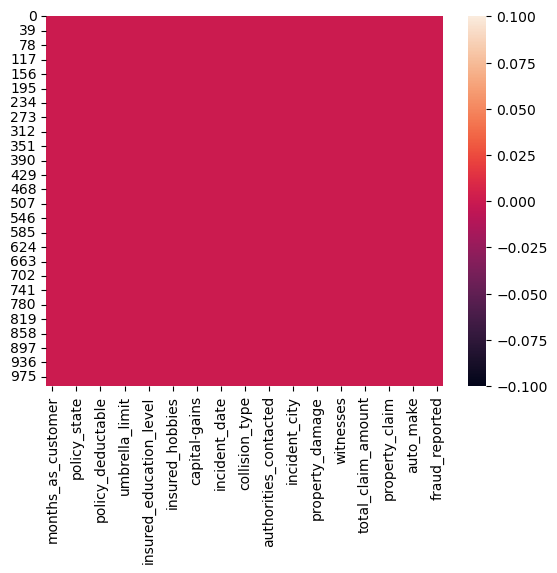

In [13]:
#Visualizationg the null values 
sns.heatmap(claim.isnull())

Through visualization we can see it has a uniform brigt red colour shown in the scale.
That means there is no missing values in the dataset.

<Axes: >

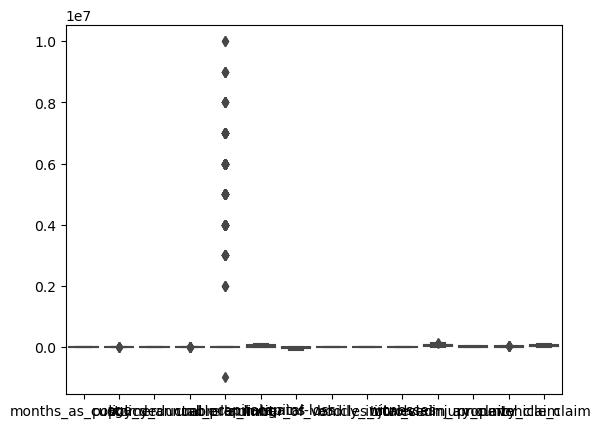

In [14]:
claim.drop_duplicates(inplace=True)
sns.boxplot(claim)

In [15]:
claim.duplicated().sum()

0

we can see that there are no duplicate values in the dataset.

In [16]:
claim.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


#This shows the statistical information of the numerical columns.
It has no negative values from the above abservation we can say that-

The count of all columns are same that means it has no missing values. 
The mean value is greater than median(50%) in most of the columns, which means data is mix skewed to the right and left. 
There is difference between the max and 75% so there are outliers present in the data. 
The standard deviation,25% percentile value and min can be notice by this describe method.

In [17]:
#checking the correlation
claim.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449
witnesses,0.058383,0.052359,0.066639,0.002332,-0.006738,-0.017651,-0.041330,-0.014669,-0.005606,1.000000,-0.011114,-0.024843,0.052640,-0.022564


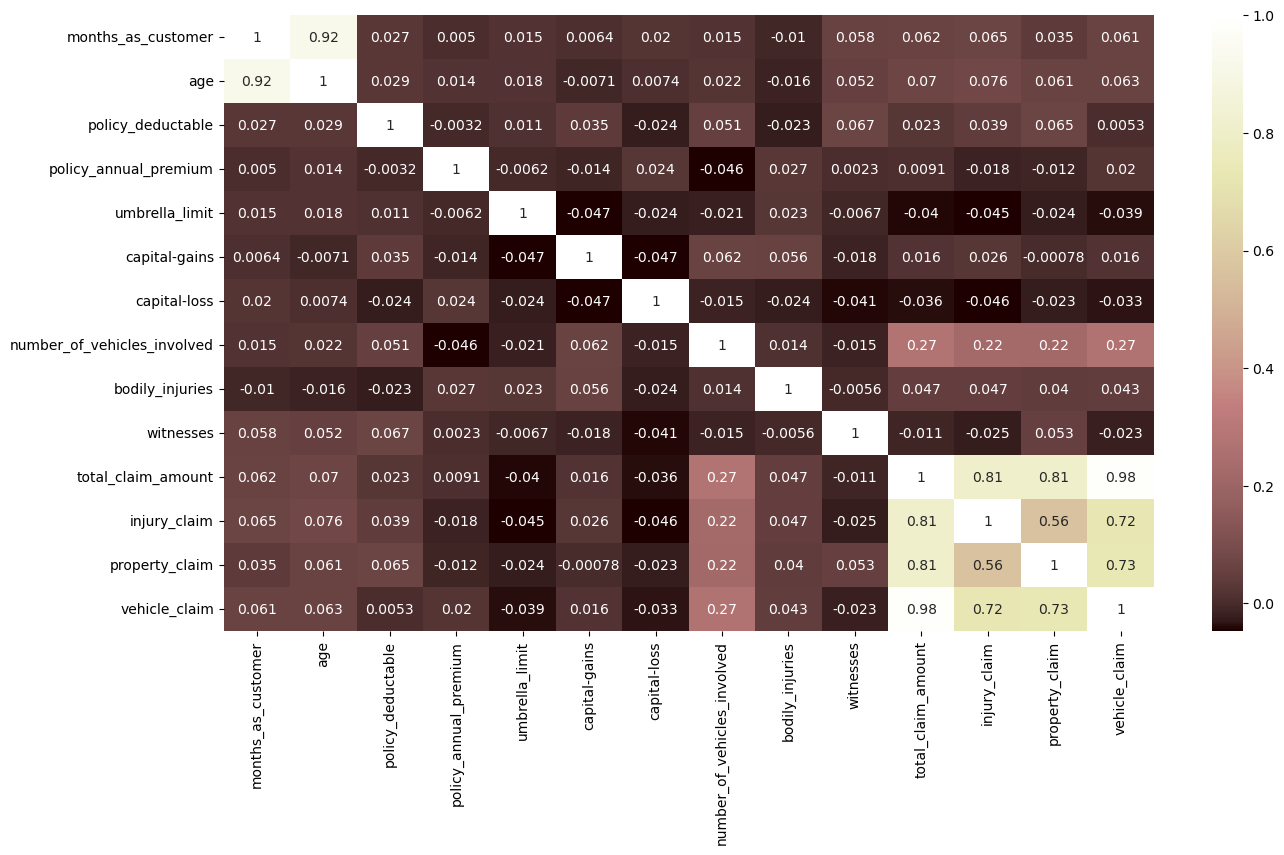

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(claim.corr(),cmap='pink',annot=True)
plt.show()

Visualization of correlation with heatmap.
The light colour represent the positive correlation and the dark colour represent the negative correlation.
1.'total_clain_amount' has possitive correlation with injury_claim,property_claim and vehicle_claim.
2.auto_year has negative correlation with policy_annual_premimum and capital_loss.
3.umbrella_limit has negative correlation with total_claim_amount, injury_claim and capital_gain.



In [19]:
#converting chategorical data into numerical
enc=OrdinalEncoder()
claim[['auto_make','auto_model','police_report_available','policy_state','fraud_reported','collision_type','incident_severity']]=enc.fit_transform(claim[['auto_make','auto_model','police_report_available','policy_state','fraud_reported','collision_type','incident_severity']])

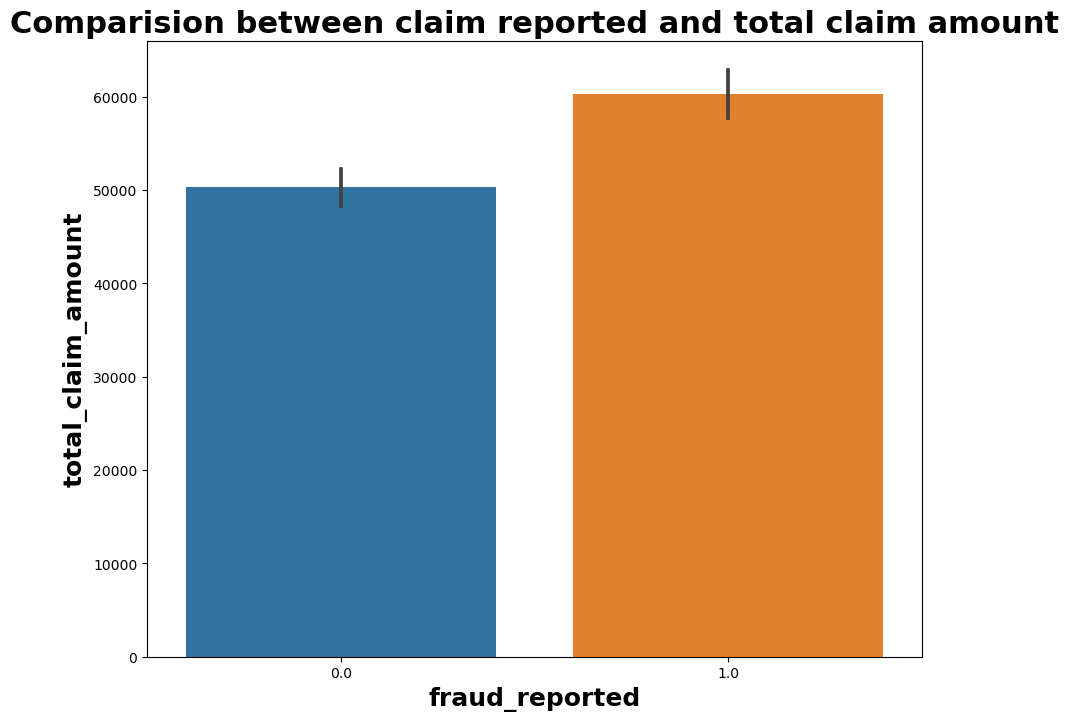

In [20]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = claim["total_claim_amount"]
p = sns.barplot(x = "fraud_reported", y = "total_claim_amount", data = claim)
plt.title('Comparision between claim reported and total claim amount', fontsize=22, fontweight='bold')
p.set_xlabel('fraud_reported',fontsize=18,fontweight ='bold')
p.set_ylabel('total_claim_amount',fontsize=18,fontweight ='bold')
plt.show()

Fraud reported 1 is for yes and 0 for no.
Here we can see that the fraud report is higher and the total claim amount is above 60000.

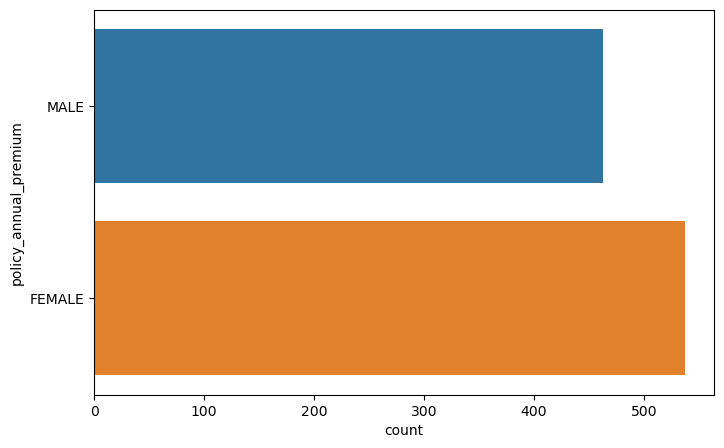

In [21]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(y = 'insured_sex', data=claim) 
ax.set_ylabel('policy_annual_premium')
plt.show()

Policy annual premimum is more for female.

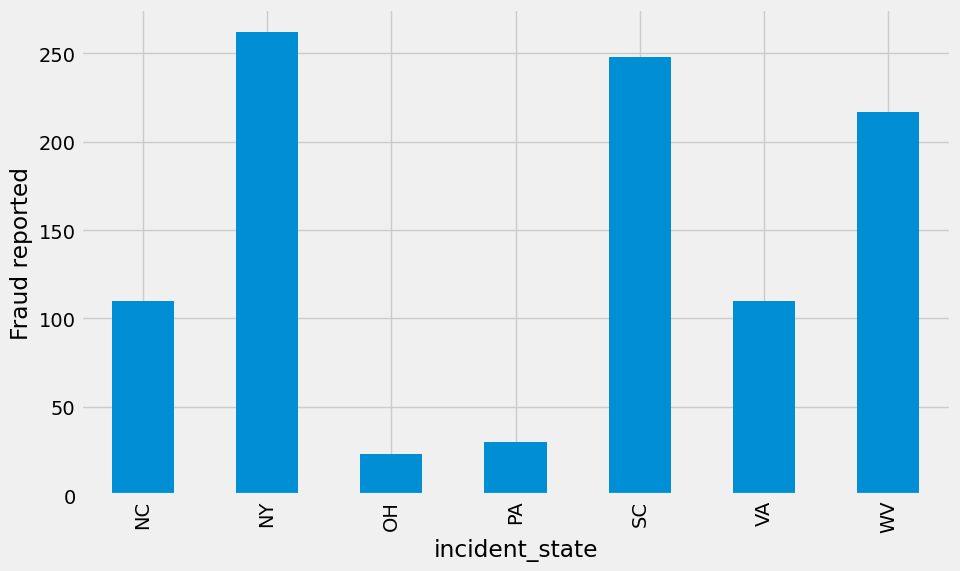

In [22]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = claim.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

This shows the highest fraud reported in which state.
NY has the highest rate of fraud reported followed by Sc

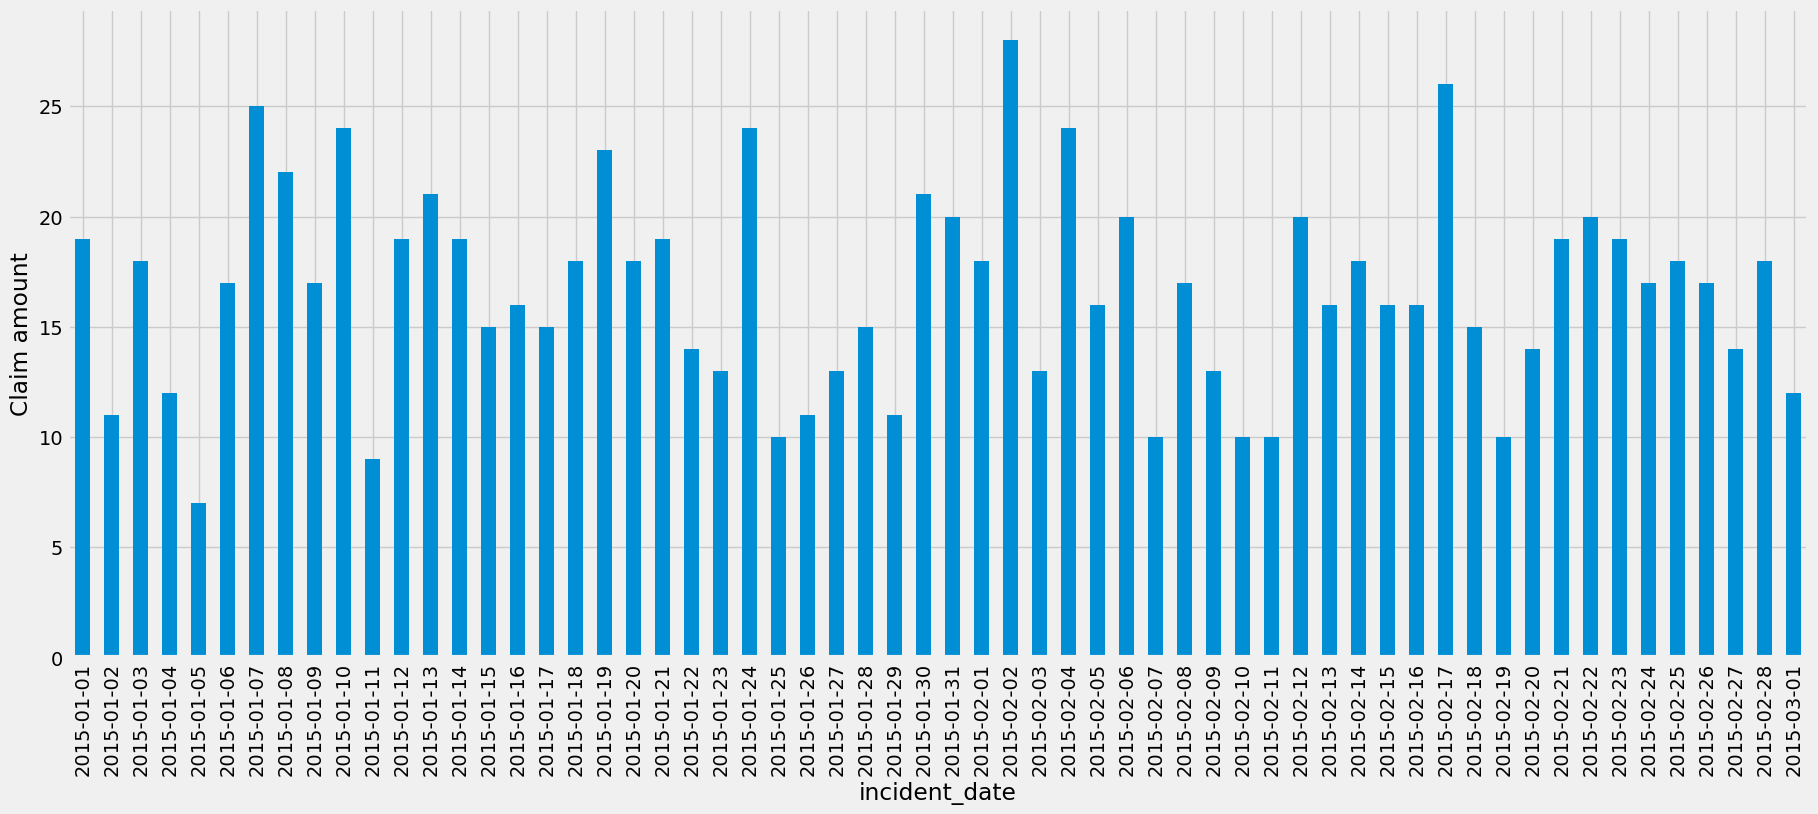

In [23]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,8))
ax = claim.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount')
plt.show()

Here we can see that year 2015-02-02 has the highest claim amount followed by 2015-02-17 then 2015-001-07.

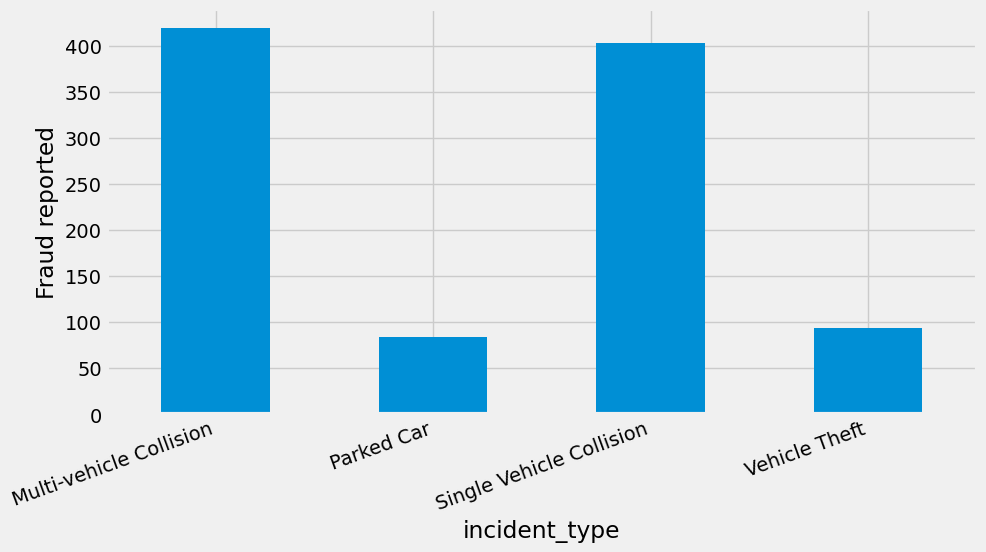

In [24]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,5))
ax = claim.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

This shows the type of incident where multiple vehicle collision is highest followed by single vehicle collision.

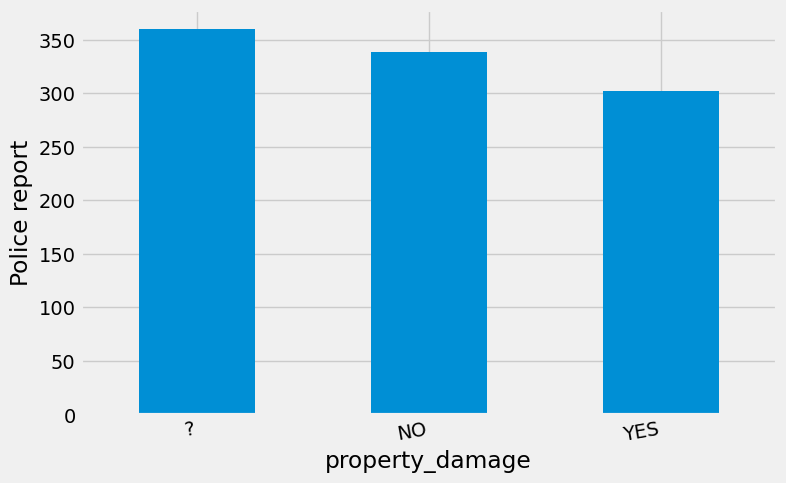

In [25]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax= claim.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

This shows the property damage according to police report unknown is highest followed by no.

In [26]:
#converting into numerical data
claim[['insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city','property_damage','insured_sex']]=enc.fit_transform(claim[['insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city','property_damage','insured_sex']]) 

In [27]:
#converting the mix data into numerical data
pd.to_numeric(claim['incident_date'], errors='coerce').fillna(0)
claim["incident_date"] = pd.to_numeric(claim['incident_date'], errors='coerce').fillna(0)
pd.to_numeric(claim['policy_csl'], errors='coerce').fillna(0)
claim["policy_csl"] = pd.to_numeric(claim['policy_csl'], errors='coerce').fillna(0)

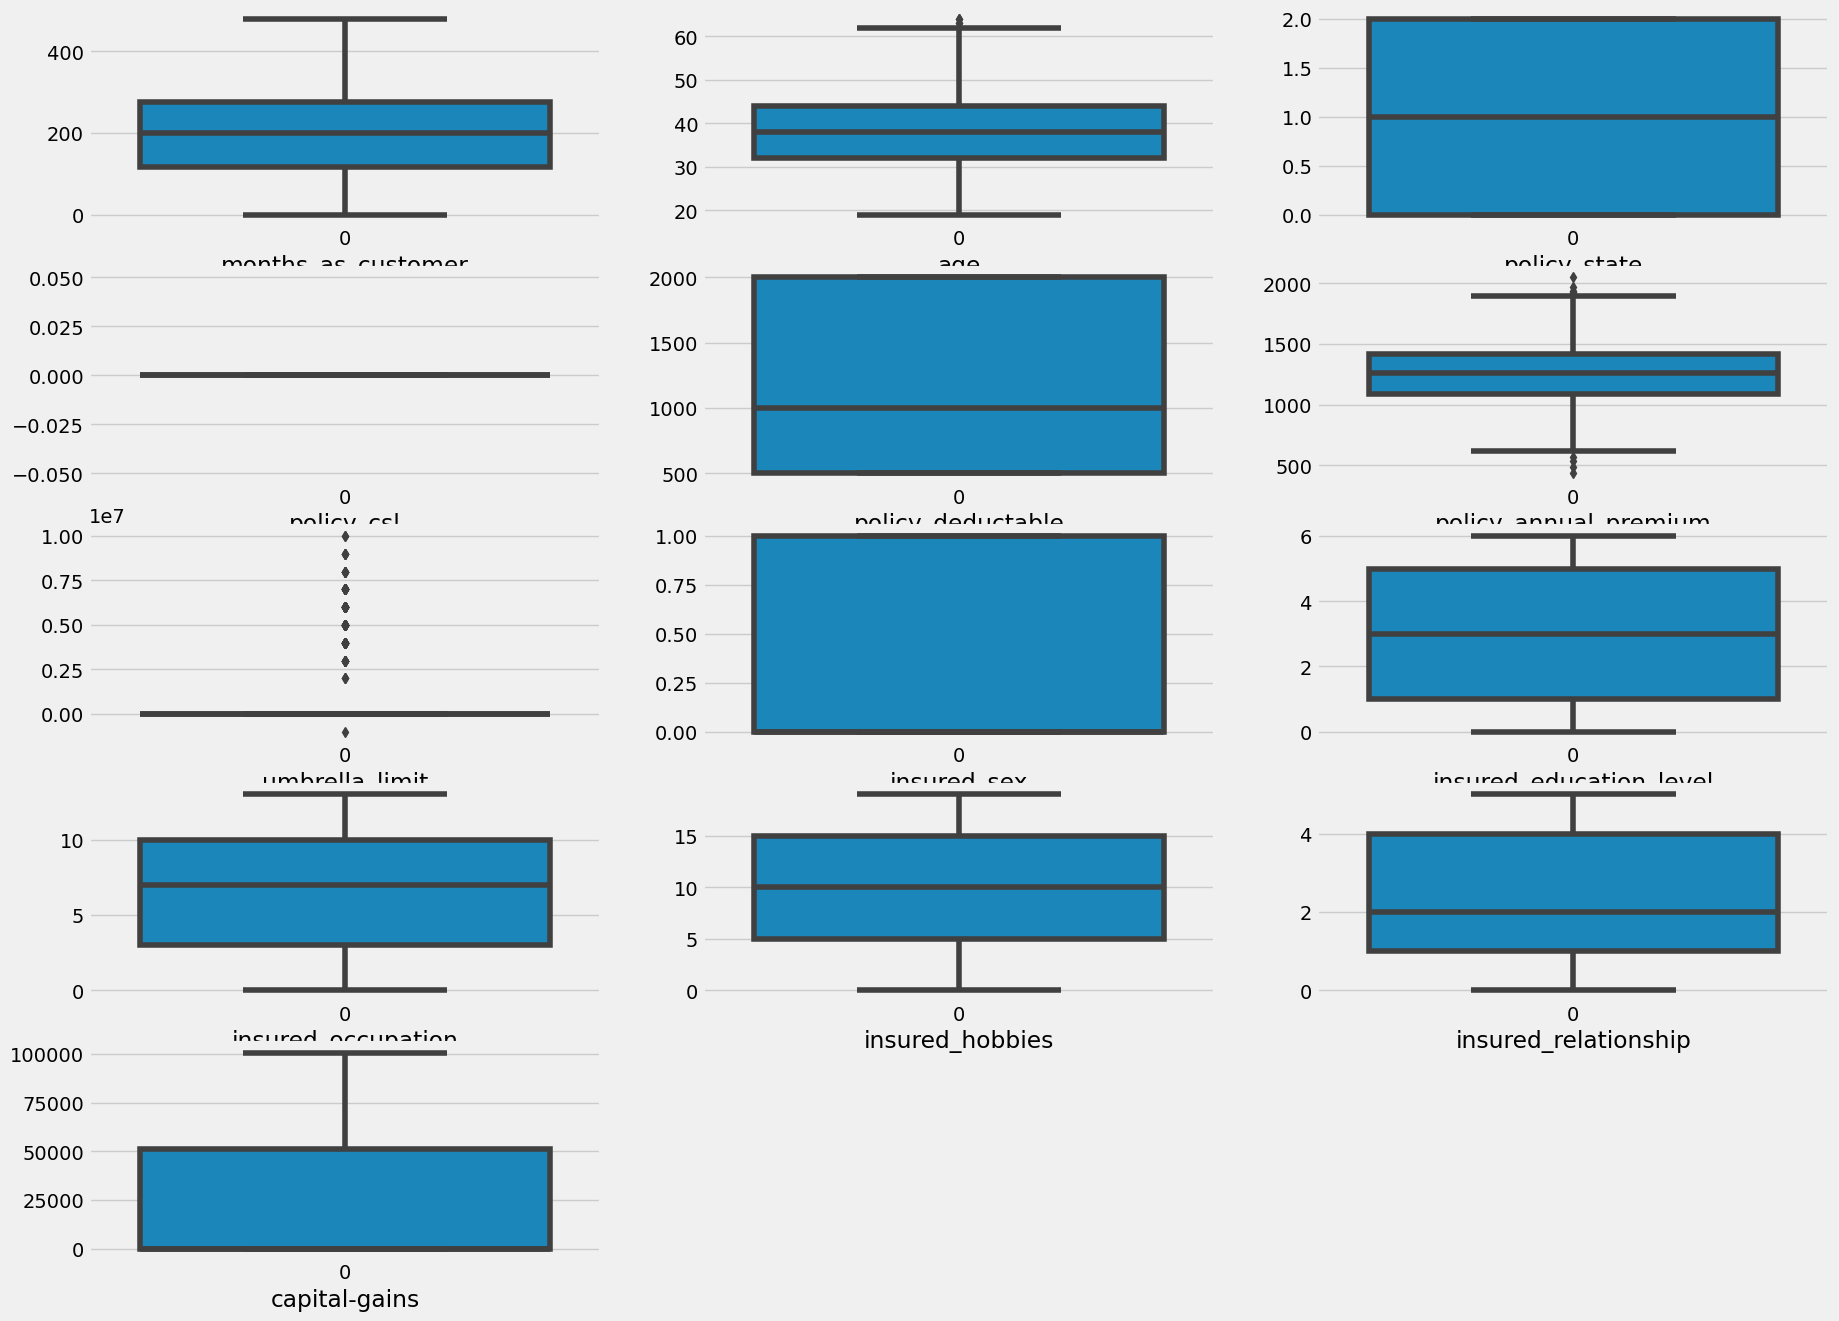

In [28]:
# checking for outliers
plt.figure(figsize=(20,25))
p=1
for i in claim:
    if p<=13:
        plt.subplot(8,3,p)
        sns.boxplot(claim[i])
        plt.xlabel(i)
        p+=1
plt.show()   

In [29]:
#checking skewness
claim.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.000000
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.000000
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636


# MODEL BUILDING

In [30]:
#distributing the data
x=claim.iloc[:,0:-1]
y=claim.iloc[:,-1]

In [31]:
x=claim.drop('fraud_reported',axis=1)
y=claim['fraud_reported']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (1000, 32)
label dimension (1000,)


In [32]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 1.07813958,  0.99083647,  1.18717314, ...,  0.74965272,
         0.85646614, -1.64574255],
       [ 0.2089946 ,  0.33407345, -0.01685641, ..., -1.82334593,
         0.36053902, -0.65747047],
       [-0.60800168, -1.08891308,  1.18717314, ..., -0.78556451,
        -0.63131523,  0.95970204],
       ...,
       [-0.64276748, -0.54161057,  1.18717314, ...,  0.77190224,
         1.1044297 , -0.02857005],
       [ 2.20802805,  2.52328351, -1.22088596, ..., -0.07357971,
        -1.37520591, -1.28637088],
       [ 2.19064515,  2.3043625 ,  1.18717314, ..., -1.81434017,
         0.36053902, -0.65747047]])

In [33]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    ra=RandomForestClassifier()
    ra.fit(x_train,y_train)
    pre=ra.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.82 at random state 65


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [35]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.8066666666666666
[[201  32]
 [ 26  41]]
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87       233
         1.0       0.56      0.61      0.59        67

    accuracy                           0.81       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.81      0.81      0.81       300



accuracy score of decisiontree is 80.66%

In [36]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

0.8166666666666667
[[225   8]
 [ 47  20]]
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89       233
         1.0       0.71      0.30      0.42        67

    accuracy                           0.82       300
   macro avg       0.77      0.63      0.66       300
weighted avg       0.80      0.82      0.79       300



accuracy score of randomforest is 81.66%

In [37]:
# Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
prelg=lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

0.82
[[221  12]
 [ 42  25]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       233
         1.0       0.68      0.37      0.48        67

    accuracy                           0.82       300
   macro avg       0.76      0.66      0.69       300
weighted avg       0.80      0.82      0.80       300



accuracy score of logistic regression is 82.00%

In [38]:
#Support vector machine
svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.7766666666666666
[[233   0]
 [ 67   0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87       233
         1.0       0.00      0.00      0.00        67

    accuracy                           0.78       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.60      0.78      0.68       300



accuracy score of svc is 77.66%

In [39]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.7733333333333333
[[224   9]
 [ 59   8]]
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87       233
         1.0       0.47      0.12      0.19        67

    accuracy                           0.77       300
   macro avg       0.63      0.54      0.53       300
weighted avg       0.72      0.77      0.72       300



accuracy score of extratree is 77.33%

# CHECKING CROSS VALIDATION

In [40]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.76  0.77  0.77  0.775 0.825]
0.7799999999999999
0.023021728866442655
difference between accuracu score and cross validation 0.026666666666666727


cross validation score decision tree is 0.7799999999999999

In [41]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.75  0.74  0.725 0.785 0.785]
0.757
0.024207436873820428
difference between accuracy score and corss validation 0.059666666666666646


cross validation score of randomforest is 0.757

In [42]:
# Cv score for logistic regression
score= cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.79  0.765 0.72  0.81  0.82 ]
0.781
0.03583294573433784
difference between accuracy score and corss validation 0.038999999999999924


cross validation score of logistic regression 0.781

In [43]:
# Cv score for Support vector machine
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.745 0.745 0.72  0.76  0.755]
0.7449999999999999
0.013784048752090234
difference between accuracy score and corss validation 0.07500000000000007


cross validation score of svc is 0.7449999999999999

In [44]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.745 0.745 0.715 0.765 0.755]
0.745
0.016733200530681527
difference between accuracy score and cross validation 0.02833333333333332


cross validation score of extratrees is 0.745

Decision tree is our best model as the difference between accuracy score and cross validation score is least.

# SETTING PARAMETERS

In [45]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [46]:
para={'criterion':['gini','entropy'],
      'min_samples_split':[2],
     'max_depth':[None]}
dtc_cv=GridSearchCV(dtc,para,cv=10)
dtc_cv.fit(x_train,y_train)
print(dtc_cv.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


In [47]:
dtc_new=DecisionTreeClassifier(criterion='entropy',min_samples_split=2,max_depth=None)
dtc_new.fit(x_train,y_train)
y_pred_new=dtc_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

-0.056947024533982926


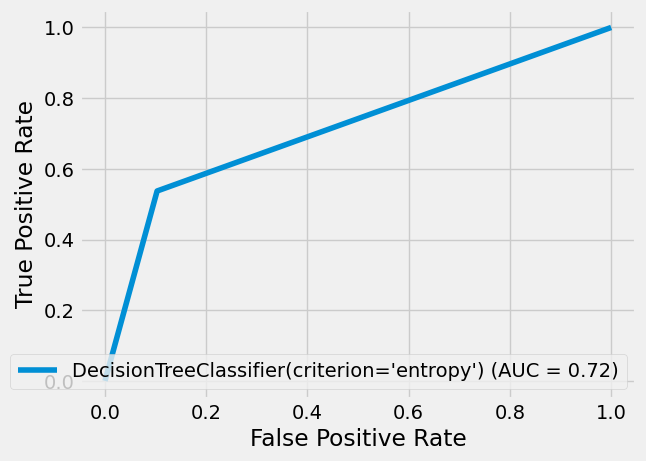

In [48]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_new)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=dtc_new)
display.plot()

Here we have plotted the ROC curve for yhe model and the Auc value of the best model is 72%

In [49]:
#Saving the model
import joblib
import pickle
filename="Insurance claim.pkl"
pickle.dump(dtc_new,open(filename,'wb'))

In [50]:
#predicting the save model
model=pickle.load(open('Insurance claim.pkl','rb'))

In [51]:
result=model.score(x_test,y_test)
print(result*100)

81.66666666666667


In [52]:
con=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
predicted,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
orginal,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
